Importing the libraries/dependencies

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


Data Collection and Processing

In [10]:
#loading the csv data to a Pandas Dataframe
gold_data = pd.read_csv('/content/drive/MyDrive/Machine Learning Projects/Project 8 Gold Price Prediction/gld_price_data.csv')

#print the first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [11]:
#print the last 5 rows of the dataframe
gold_data.tail()

#quite a large data

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [13]:
#number of rows and columns
gold_data.shape

#2290 rows and 6 columns

(2290, 6)

In [15]:
#getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [16]:
#checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [17]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1. Positive Correlation ~ directly proportional
2. Negative Correlation ~ indirectly proportional

In [18]:
correlation = gold_data.corr()

<ipython-input-18-b9d572e5c3ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

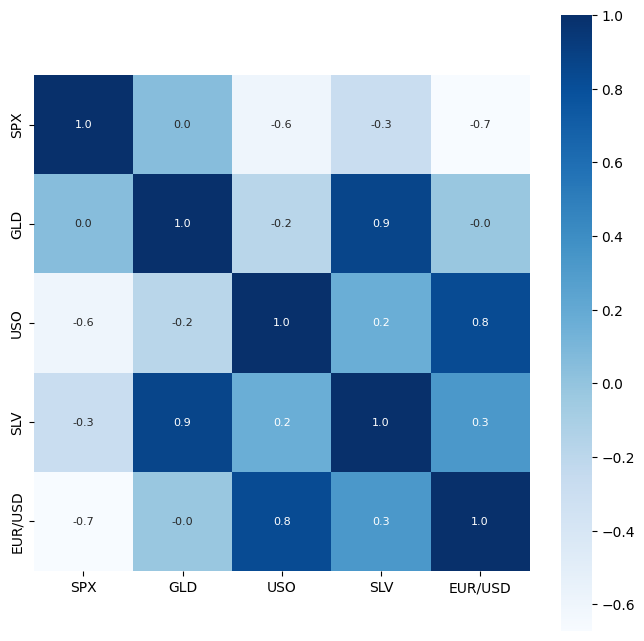

In [21]:
# constructing a heatmap to understand the correlation

plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size':8}, cmap = 'Blues')

# cbar is the color bar
# fmt is the number of decimal values

In [22]:
#correlation values of GLD
print(correlation['GLD'])


SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-25-da1db9dcedee>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color = 'green')


<Axes: xlabel='GLD', ylabel='Density'>

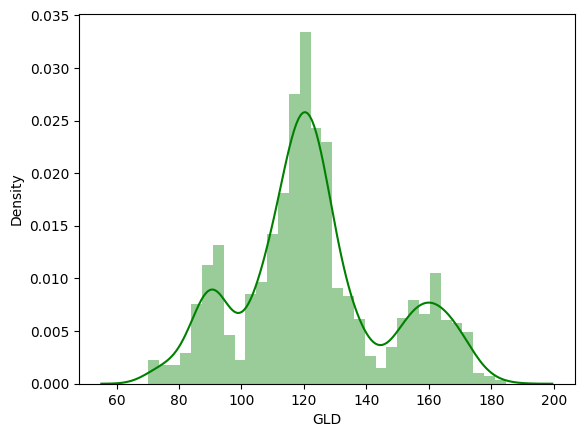

In [25]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color = 'green')

#majority of the values are in the 120 range
#density is the number of values we have

Splitting the Features and Target

In [26]:
X = gold_data.drop(columns = ['Date','GLD'], axis = 1)
Y = gold_data['GLD']

In [28]:
print(X) #use this to predict the gold prices
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test Data

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = .2, random_state= 2)

In [30]:
print(X.shape, X_train.shape, X_test.shape)

(2290, 4) (1832, 4) (458, 4)


Model Training: Random Forest Regressor

In [31]:
regressor = RandomForestRegressor(n_estimators=100) #default number to give

In [32]:
#training the model
regressor.fit(X_train, Y_train)


RandomForestRegressor()

Model Evaluation

In [36]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)


In [37]:
print(test_data_prediction) #compare the prediction with actual values

[168.25439928  81.92829994 116.18720004 127.56370068 120.84250133
 154.71419767 150.41449827 125.95880042 117.62709861 125.91920083
 116.66860096 171.88040068 141.70319826 167.81889816 115.06069979
 117.50840065 137.79650375 169.9797004  159.42720359 157.55409932
 155.07330027 125.31350009 176.38850003 157.15380298 125.21430028
  93.7532992   78.20310009 120.57409976 119.06309897 167.44739945
  88.20540032 125.41589999  91.17450069 117.64799981 121.15559917
 136.17840158 115.25500116 115.24810084 148.45399918 107.11490089
 104.2603024   87.07749805 126.51530049 117.89069978 152.535999
 119.69669994 108.47519965 108.2064982   93.10600045 126.8985985
  74.52890028 113.71149929 121.3415001  111.26529906 118.81029886
 120.28319937 158.3359002  167.23300157 147.05569702  85.78339816
  94.36680037  86.81549868  90.40590016 118.97190076 126.46510082
 127.48200034 169.47500079 122.31549929 117.66129865  98.56270054
 168.54930179 143.0401989  132.45630225 121.13420202 121.13839952
 119.84440038

In [39]:
# R Squared Error ~ check for test data

error_score = metrics.r2_score(Y_test,test_data_prediction)

In [41]:
print('R squared eroor: ', error_score) #the ranges are in 100s, so the r square error is very less.

R squared eroor:  0.9893591835383906


Compare the Actual Values and Predicted Values in a Plot

In [45]:
#another way to analyze our model accuracy ~ by plotting graphs
Y_test = list(Y_test) #convert to a list

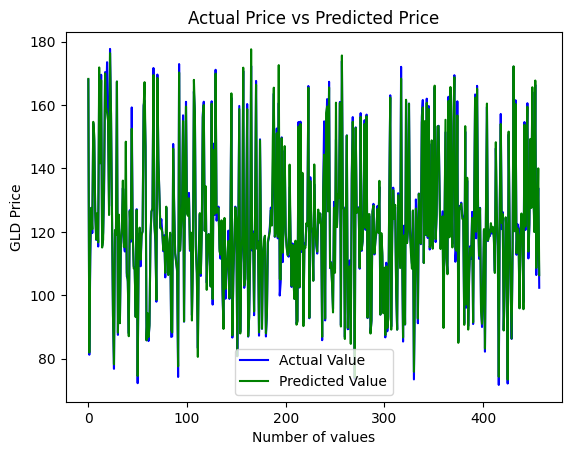

In [49]:
plt.plot(Y_test, color = 'blue', label = 'Actual Value')
plt.plot(test_data_prediction, color = 'green',label = 'Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

#plotting the predicted values on top of the actual values